In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()

# Combine the data into a single dataset
combined_pyber_data = pd.merge(ride_df, city_df, on="city")


In [2]:
# Display the data table for preview
combined_pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

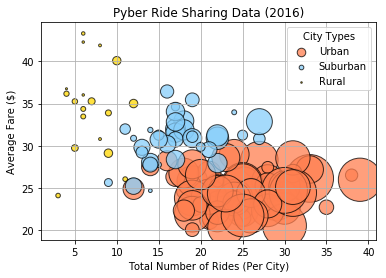

In [3]:
# Obtain the x and y coordinates for each of the three city types

# City types Urban
urban_combined_pyber_data = combined_pyber_data.loc[combined_pyber_data['type']=='Urban',:]

grouped_by_cities1 = urban_combined_pyber_data.groupby('city')
rides_per_city1 = grouped_by_cities1["ride_id"].count()

fares_per_city1 = grouped_by_cities1["fare"].mean()

drivers_per_city1 = grouped_by_cities1["driver_count"].sum()

plot1 = plt.scatter(rides_per_city1, fares_per_city1, marker="o", facecolors="coral", edgecolors="black",
            s=drivers_per_city1, alpha=0.75)

# City types Suburban
urban_combined_pyber_data = combined_pyber_data.loc[combined_pyber_data['type']=='Suburban',:]

grouped_by_cities2 = urban_combined_pyber_data.groupby('city')
rides_per_city2 = grouped_by_cities2["ride_id"].count()

fares_per_city2 = grouped_by_cities2["fare"].mean()

drivers_per_city2 = grouped_by_cities2["driver_count"].sum()

plot2 = plt.scatter(rides_per_city2, fares_per_city2, marker="o", facecolors='lightskyblue', edgecolors="black",
            s=drivers_per_city2, alpha=0.75)

# City types Rural
urban_combined_pyber_data = combined_pyber_data.loc[combined_pyber_data['type']=='Rural',:]

grouped_by_cities3 = urban_combined_pyber_data.groupby('city')
rides_per_city3 = grouped_by_cities3["ride_id"].count()

fares_per_city3 = grouped_by_cities3["fare"].mean()

drivers_per_city3 = grouped_by_cities3["driver_count"].sum()

plot3 = plt.scatter(rides_per_city3, fares_per_city3, marker="o", facecolors='gold', edgecolors="black",
            s=drivers_per_city3, alpha=0.75)


# Incorporate the other graph properties
plt.grid()

# Create a legend
plt.legend((plot1, plot2, plot3),("Urban", "Suburban", "Rural"), loc="best", title='City Types', markerscale = .25)

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Save Figure
plt.savefig("Pyscatter.png")
# Show plot
plt.show()

## Total Fares by City Type

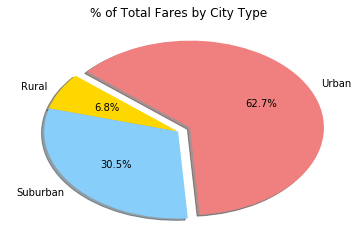

In [4]:
# Calculate Type Percents

total_fares = combined_pyber_data['fare'].sum()

grouped_by_types = combined_pyber_data.groupby('type')
fares_per_type = (grouped_by_types['fare'].sum()/total_fares)*100
fares_per_type

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.1)

plt.title("% of Total Fares by City Type")

plt.pie(fares_per_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("TotalFaresByCityType.png")

# Show Figure
plt.show()


## Total Rides by City Type

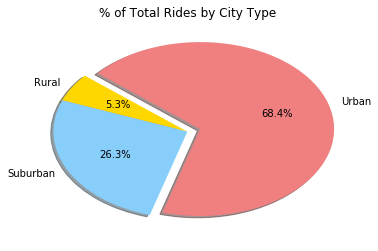

In [5]:
# Calculate Ride Percents
total_rides = combined_pyber_data['ride_id'].count()

rides_per_type = (grouped_by_types['ride_id'].count()/total_rides)*100

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.1)

plt.title("% of Total Rides by City Type")

plt.pie(rides_per_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("TotalRidesByCityType.png")

# Show Figure
plt.show()


## Total Drivers by City Type

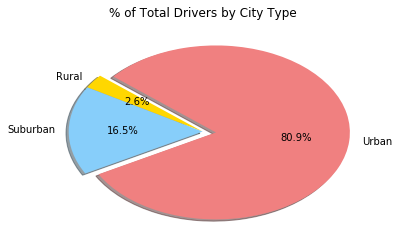

In [6]:
# Calculate Driver Percents
grouped_by_cities = combined_pyber_data.groupby('city')
total_drivers_list = grouped_by_cities['driver_count'].unique()
# print(total_drivers_list)

total_drivers = [total_driver[0] for total_driver in total_drivers_list]
sum_total_drivers = sum(total_drivers)

city_type_list = grouped_by_cities['type'].unique()
city_types = [city_type[0] for city_type in city_type_list]

combined_type_data = pd.DataFrame({'type':city_types, 'total_drivers':total_drivers})

grouped_drivers = combined_type_data.groupby('type')
grouped_drivers_by_types = grouped_drivers['total_drivers'].sum()
drivers_per_type = (grouped_drivers_by_types/sum_total_drivers)*100

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.1)

plt.title("% of Total Drivers by City Type")

plt.pie(drivers_per_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("TotalDriversByCityType.png")

# Show Figure
plt.show()
